<a href="https://colab.research.google.com/github/mmopenat/Image_processing/blob/main/ABSA_Violations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load all CSV files using the correct delimiter and forgiving parser
absa_master = pd.read_csv('ABSA master sheet.csv', sep=';', engine='python')
absa_may = pd.read_csv('ABSA_May.csv', sep=';', engine='python')


# Clean column names by stripping whitespace
absa_may.columns = absa_may.columns.str.strip()
absa_master.columns = absa_master.columns.str.strip()

# Keep only relevant columns from master for matching
absa_master_clean = absa_master[['ABSA filling station', 'Participating filling station close by']].dropna()

# Merge ABSA_May with master on Merchant Name ↔ ABSA filling station
merged_df = absa_may.merge(
    absa_master_clean,
    how='left',
    left_on='Merchant Name',
    right_on='ABSA filling station'
)

# Select and reorder the output columns
result_df = merged_df[[
    'Transaction Date', 'QUANTITY', 'Amount', 'Region', 'Registration',
    'Merchant Name', 'Participating filling station close by'
]]

# Define logic to set the Violation column
def determine_violation(x):
    if pd.isna(x):
        return 'UNKNOWN'
    elif 'Used ABSA in a participating filling station' in x:
        return 'YES'
    elif 'Nothing close by' in x:
        return 'NO'
    elif 'Unable to locate the filling station' in x:
        return 'UNKNOWN'
    else:
        return 'YES'

# Apply the logic to determine violations
result_df['Violation'] = result_df['Participating filling station close by'].apply(determine_violation)

# Save to CSV if needed
result_df.to_csv('ABSA_May_Violation_Result_1.csv', index=False)


In [ ]:
import pandas as pd

# Load all CSV files using the correct delimiter and forgiving parser
# Removed the 'error_bad_lines' argument which is no longer supported in newer pandas versions
absa_master = pd.read_csv('ABSA master sheet.csv', sep=';', engine='python')
absa_may = pd.read_csv('ABSA_May.csv', sep=';', engine='python')

# Clean column names by stripping whitespace
absa_may.columns = absa_may.columns.str.strip()
absa_master.columns = absa_master.columns.str.strip()

# Keep only relevant columns from master for matching
absa_master_clean = absa_master[['ABSA filling station', 'Participating filling station close by']].dropna()

# Merge ABSA_May with master on Merchant Name ↔ ABSA filling station
merged_df = absa_may.merge(
    absa_master_clean,
    how='left',
    left_on='Merchant Name',
    right_on='ABSA filling station'
)

# Select and reorder the output columns
result_df = merged_df[[
    'Transaction Date', 'QUANTITY', 'Amount', 'Region', 'Registration',
    'Merchant Name', 'Participating filling station close by'
]]

# Define logic to set the Violation column
def determine_violation(x):
    if pd.isna(x):
        return 'UNKNOWN'
    elif 'Used ABSA in a participating filling station' in str(x): # Added str(x) to handle potential non-string types
        return 'YES'
    elif 'Nothing close by' in str(x): # Added str(x)
        return 'NO'
    elif 'Unable to locate the filling station' in str(x): # Added str(x)
        return 'UNKNOWN'
    else:
        return 'YES'

# Apply the logic to determine violations
# Using .loc to avoid SettingWithCopyWarning
result_df.loc[:, 'Violation'] = result_df['Participating filling station close by'].apply(determine_violation)

# Save to CSV if needed
result_df.to_csv('ABSA_May_Violation_Result.csv', index=False)

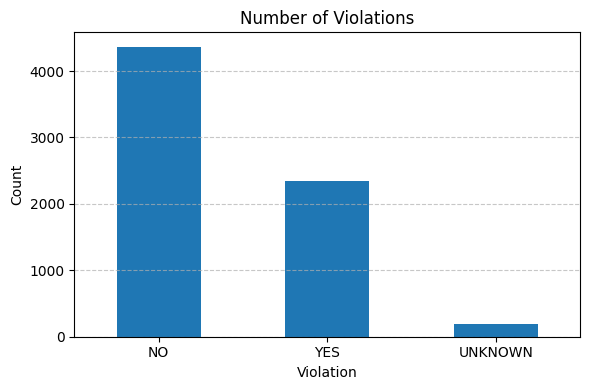

In [ ]:
import matplotlib.pyplot as plt

# Count number of YES violations
violation_counts = result_df['Violation'].value_counts()

# Plot the count of YES violations
plt.figure(figsize=(6, 4))
violation_counts.plot(kind='bar')
plt.title('Number of Violations')
plt.xlabel('Violation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


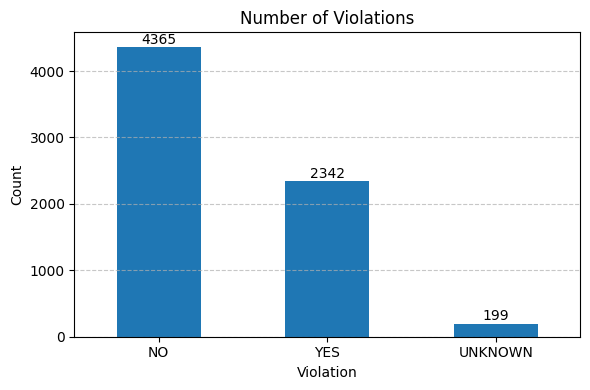

In [ ]:
# Plot again with number labels
plt.figure(figsize=(6, 4))
bars = violation_counts.plot(kind='bar')
plt.title('Number of Violations')
plt.xlabel('Violation')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, count in enumerate(violation_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


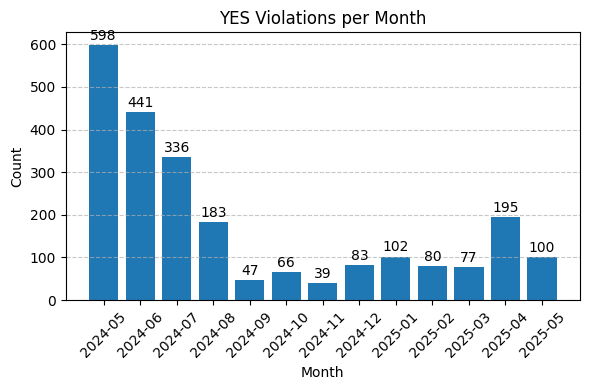

In [ ]:
# Amend code to plot YES violations per month using the same style
plt.figure(figsize=(6, 4))
bars = plt.bar(monthly_yes_counts['Month'].astype(str), monthly_yes_counts['YES Violations'])
plt.title('YES Violations per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()


<ipython-input-40-0928d1139b2c>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yes_violations['Month'] = yes_violations['Transaction Date'].dt.to_period('M')


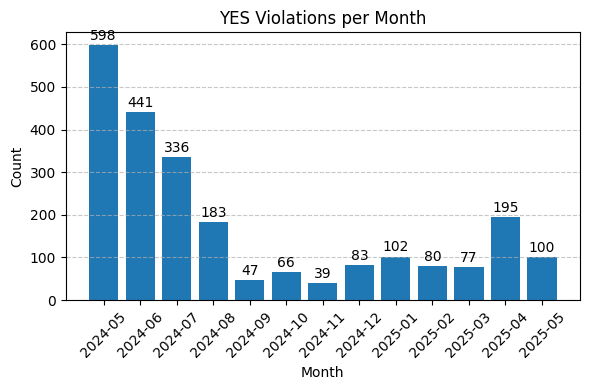

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files
absa_master = pd.read_csv('ABSA master sheet.csv', sep=';', engine='python')
absa_may = pd.read_csv('ABSA_May.csv', sep=';', engine='python')

# Clean column names
absa_may.columns = absa_may.columns.str.strip()
absa_master.columns = absa_master.columns.str.strip()

# Keep relevant columns from master
absa_master_clean = absa_master[['ABSA filling station', 'Participating filling station close by']].dropna()

# Merge on 'Merchant Name' and 'ABSA filling station'
merged_df = absa_may.merge(
    absa_master_clean,
    how='left',
    left_on='Merchant Name',
    right_on='ABSA filling station'
)

# Prepare final DataFrame
result_df = merged_df[[
    'Transaction Date', 'QUANTITY', 'Amount', 'Region', 'Registration',
    'Merchant Name', 'Participating filling station close by'
]]

# Define violation logic
def determine_violation(x):
    x = str(x)
    if pd.isna(x) or 'Unable to locate the filling station' in x:
        return 'UNKNOWN'
    elif 'Used ABSA in a participating filling station' in x:
        return 'YES'
    elif 'Nothing close by' in x:
        return 'NO'
    else:
        return 'YES'

# Apply violation logic
result_df['Violation'] = result_df['Participating filling station close by'].apply(determine_violation)

# Convert to datetime
result_df['Transaction Date'] = pd.to_datetime(result_df['Transaction Date'], errors='coerce')

# Filter YES violations and group by month
yes_violations = result_df[result_df['Violation'] == 'YES']
yes_violations['Month'] = yes_violations['Transaction Date'].dt.to_period('M')
monthly_yes_counts = yes_violations.groupby('Month').size().reset_index(name='YES Violations')

# Plot the graph
plt.figure(figsize=(6, 4))
bars = plt.bar(monthly_yes_counts['Month'].astype(str), monthly_yes_counts['YES Violations'])
plt.title('YES Violations per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, str(height), ha='center', va='bottom')

plt.tight_layout()
plt.show()
